## Importamos las librerias ## 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
cash_original = pd.read_csv("extract - cash request - data analyst.csv")
cash = cash_original.copy()

In [39]:
fees_original = pd.read_csv("extract - fees - data analyst - .csv")
fees = fees_original.copy()

In [11]:
cash.info()
cash.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

In [12]:
cash.describe()

,id,amount,user_id,deleted_account_id
count,23970.000000,23970.000000,21867.000000,2104.000000
mean,13910.966124,82.720818,32581.250789,9658.755228
std,7788.117214,26.528065,27618.565773,7972.743249
min,3.000000,1.000000,34.000000,91.000000
25%,7427.250000,50.000000,10804.000000,3767.000000
50%,14270.500000,100.000000,23773.000000,6121.500000
75%,20607.750000,100.000000,46965.000000,16345.000000
max,27010.000000,200.000000,103719.000000,30445.000000


In [13]:
cash.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [36]:
cash.iloc[13126]

id                                                       13072
amount                                                    50.0
status                                              money_back
created_at                    2020-08-19 12:10:19.845244+00:00
updated_at                    2020-12-18 13:09:41.910619+00:00
user_id                                                20421.0
moderated_at                  2020-08-19 12:42:54.306478+00:00
deleted_account_id                                         NaN
reimbursement_date                   2020-09-07 22:00:00+00:00
cash_request_received_date                          2020-08-20
money_back_date                  2020-11-27 09:55:55.744445+00
transfer_type                                          instant
send_at                       2020-08-26 12:10:19.781950+00:00
recovery_status                                      completed
reco_creation                    2020-09-09 20:50:55.614924+00
reco_last_update                  2020-11-27 09:55:55.7

In [37]:
cash['created_at'] = pd.to_datetime(cash['created_at'])
cash['updated_at'] = pd.to_datetime(cash['updated_at'])
cash['moderated_at'] = pd.to_datetime(cash['moderated_at'],unit='ns')
cash['reimbursement_date'] = pd.to_datetime(cash['reimbursement_date'],unit='ns')
cash['cash_request_received_date'] = pd.to_datetime(cash['cash_request_received_date'],unit='ns')
cash['money_back_date'] = pd.to_datetime(cash['money_back_date'],unit='ns')
cash['send_at'] = pd.to_datetime(cash['send_at'],unit='ns')
cash['reco_creation'] = pd.to_datetime(cash['reco_creation'],unit='ns')
cash['reco_last_update'] = pd.to_datetime(cash['reco_last_update'],unit='ns')

In [38]:
cash.info()
cash.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  datetime64[ns, UTC]
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             16543 non-null  datetime64[ns,

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804.0,2019-12-11 16:47:42.405646+00:00,NaN,2020-01-09 19:05:21.596363+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231.0,2019-12-11 14:24:22.897988+00:00,NaN,2020-01-09 19:50:12.347780+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191.0,2019-12-11 09:46:59.777728+00:00,NaN,2020-01-09 19:13:35.825041+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00:00,761.0,2019-12-18 14:26:18.128407+00:00,NaN,2020-01-09 19:16:10.879606+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.340080+00:00,7686.0,2020-05-07 09:21:55.320193+00:00,NaN,2020-06-05 22:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT


In [40]:
fees.info()
fees.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


,id,cash_request_id,total_amount
count,21061.000000,21057.000000,21061.000000
mean,10645.355111,16318.449162,5.000237
std,6099.315256,6656.149949,0.034453
min,1.000000,1456.000000,5.000000
25%,5385.000000,11745.000000,5.000000
50%,10652.000000,17160.000000,5.000000
75%,15925.000000,21796.000000,5.000000
max,21193.000000,27010.000000,10.000000


In [41]:
fees['created_at'] = pd.to_datetime(fees['created_at'])
fees['updated_at'] = pd.to_datetime(fees['updated_at'])
fees['paid_at'] = pd.to_datetime(fees['paid_at'],unit='ns')
fees['from_date'] = pd.to_datetime(fees['from_date'],unit='ns')
fees['to_date'] = pd.to_datetime(fees['to_date'],unit='ns')

In [42]:
fees.info()
fees.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               21061 non-null  int64              
 1   cash_request_id  21057 non-null  float64            
 2   type             21061 non-null  object             
 3   status           21061 non-null  object             
 4   category         2196 non-null   object             
 5   total_amount     21061 non-null  float64            
 6   reason           21061 non-null  object             
 7   created_at       21061 non-null  datetime64[ns, UTC]
 8   updated_at       21061 non-null  datetime64[ns, UTC]
 9   paid_at          15531 non-null  datetime64[ns, UTC]
 10  from_date        7766 non-null   datetime64[ns, UTC]
 11  to_date          7766 non-null   datetime64[ns, UTC]
 12  charge_moment    21061 non-null  object             
dtypes: datetime64[ns

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.470110+00:00,NaT,NaT,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.459080+00:00,NaT,NaT,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.432910+00:00,NaT,NaT,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00:00,2020-11-19 05:09:22.500223+00:00,NaT,NaT,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00:00,2020-11-02 14:45:20.355598+00:00,NaT,NaT,after


In [58]:
print('Estos son los nulos del df fees:\n',fees.isnull().sum())

Estos son los nulos del df fees:
 id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64


In [59]:
print('Estos son los nulos del df Cash:\n',cash.isnull().sum())

Estos son los nulos del df Cash:
 id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64


In [79]:
print(len(cash['id']))
print(len(cash['id'].unique()))
print(len(fees['cash_request_id']))
print(len(fees['cash_request_id'].unique()))



23970
23970
21061
12934


In [106]:
print(cash['amount'].unique())

[100.  99.  90.   1.  70.  25.  50.  20.  60.  80.  30.  10.  40. 150.
  98. 200.  85.  65.  95.  31.  75.  72.  22.  67.  94.  45.  55.  35.
  97.  28.  86.   8.  15.  39.   2.  11.  49.   5.  36.  54.  24.]


In [107]:
cash.groupby("status").agg('count')

,id,amount,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
status,,,,,,,,,,,,,,,
active,59,59,59,59,59,26,0,59,56,15,59,44,33,33,33
canceled,33,33,33,33,7,3,26,33,1,1,33,18,0,0,0
direct_debit_rejected,831,831,831,831,815,459,16,831,789,314,831,626,820,820,820
direct_debit_sent,34,34,34,34,34,15,0,34,34,4,34,31,16,16,16
money_back,16397,16397,16397,16397,15683,8965,715,16397,15408,16207,16397,12012,2460,2460,2460
rejected,6568,6568,6568,6568,5221,6566,1347,6568,1,0,6568,3862,0,0,0
transaction_declined,48,48,48,48,48,1,0,48,0,2,48,48,1,1,1


In [142]:
cash.groupby(cash['updated_at'].dt.to_period("M"))['amount'].count()

C:\Users\Aleja\AppData\Local\Temp\ipykernel_1980\3913285782.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash.groupby(cash['updated_at'].dt.to_period("M"))['amount'].count()


updated_at
2019-12       94
2020-01       96
2020-02       78
2020-03       96
2020-04      177
2020-05      273
2020-06     1342
2020-07     1659
2020-08     1467
2020-09     1483
2020-10      635
2020-11     1124
2020-12    14935
2021-01      373
2021-02      138
Freq: M, Name: amount, dtype: int64

In [95]:
cash.groupby('transfer_type').agg('count')

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,send_at,recovery_status,reco_creation,reco_last_update
transfer_type,,,,,,,,,,,,,,,
instant,13882,13882,13882,13882,13882,13076,6582,806,13882,10134,10626,13878,2190,2190,2190
regular,10088,10088,10088,10088,10088,8791,9453,1298,10088,6155,5917,2763,1140,1140,1140


In [85]:
fees.groupby("status").agg('count')

,id,cash_request_id,type,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
status,,,,,,,,,,,,
accepted,14841,14841,14841,1560,14841,14841,14841,14841,14523,2985,2985,14841
cancelled,4938,4934,4938,97,4938,4938,4938,4938,90,4780,4780,4938
confirmed,88,88,88,19,88,88,88,88,2,0,0,88
rejected,1194,1194,1194,520,1194,1194,1194,1194,916,1,1,1194


## Gráficos ##

Text(0.5, 1.0, 'Recuento de transacciones por estado')

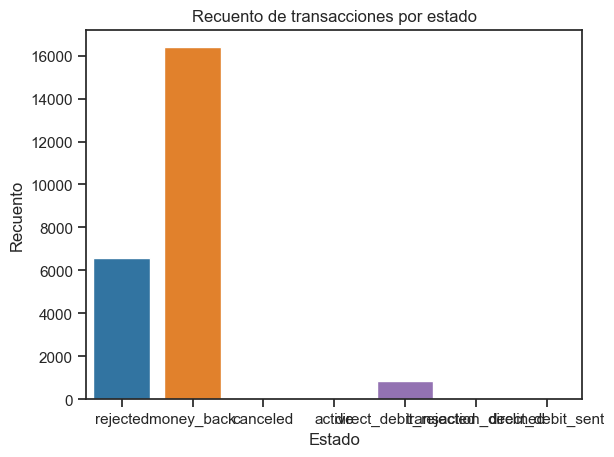

In [119]:
sns.countplot(x=cash['status'], palette='tab10')
plt.xlabel('Estado')  # Etiqueta del eje X
plt.ylabel('Recuento')  # Etiqueta del eje Y
plt.title('Recuento de transacciones por estado')

C:\Users\Aleja\AppData\Local\Temp\ipykernel_1980\515139168.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_sales = cash.groupby(cash['updated_at'].dt.to_period("M"))['amount'].count()


Text(0.5, 0, 'Meses')

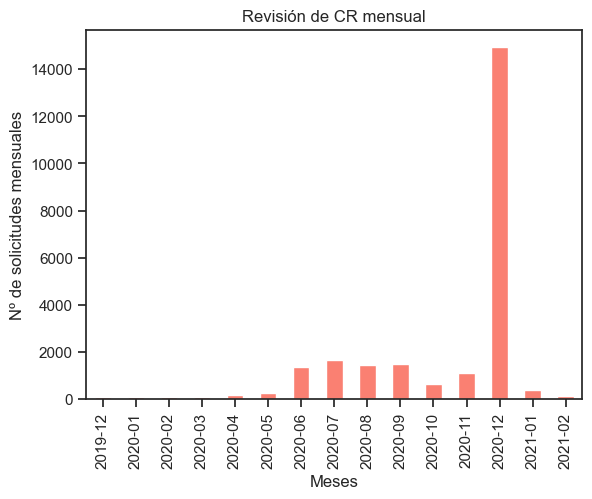

In [158]:
monthly_sales = cash.groupby(cash['updated_at'].dt.to_period("M"))['amount'].count()
monthly_sales.plot(kind='bar',color='salmon',title='Revisión de CR mensual')
plt.xticks(rotation=90)
plt.ylabel("Nº de solicitudes mensuales")
plt.xlabel("Meses")

<Axes: xlabel='status', ylabel='count'>

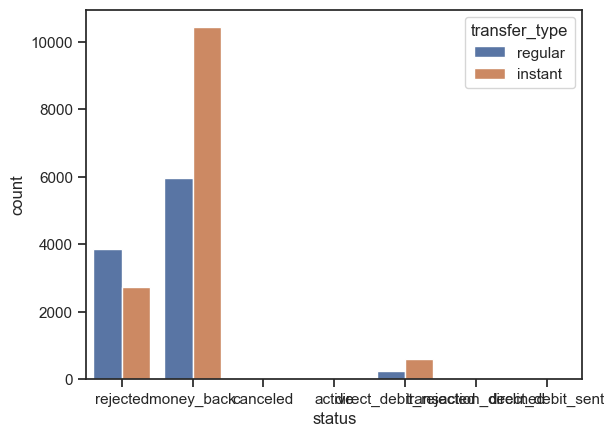

In [167]:
sns.countplot(x=cash['status'],hue=cash['transfer_type'],orient='y')

<Axes: xlabel='transfer_type', ylabel='count'>

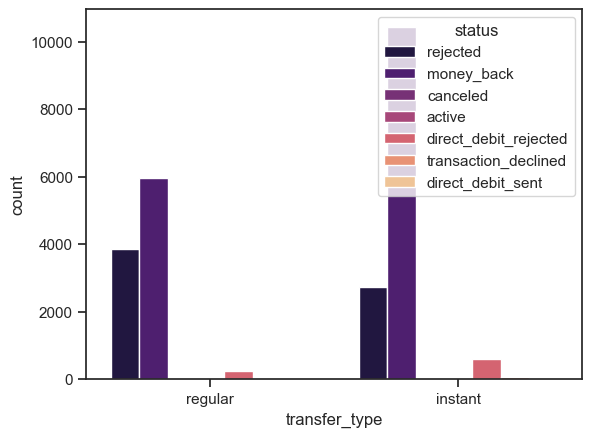

In [169]:
sns.countplot(hue=cash['status'],x=cash['transfer_type'],palette='magma')

c:\Users\Aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


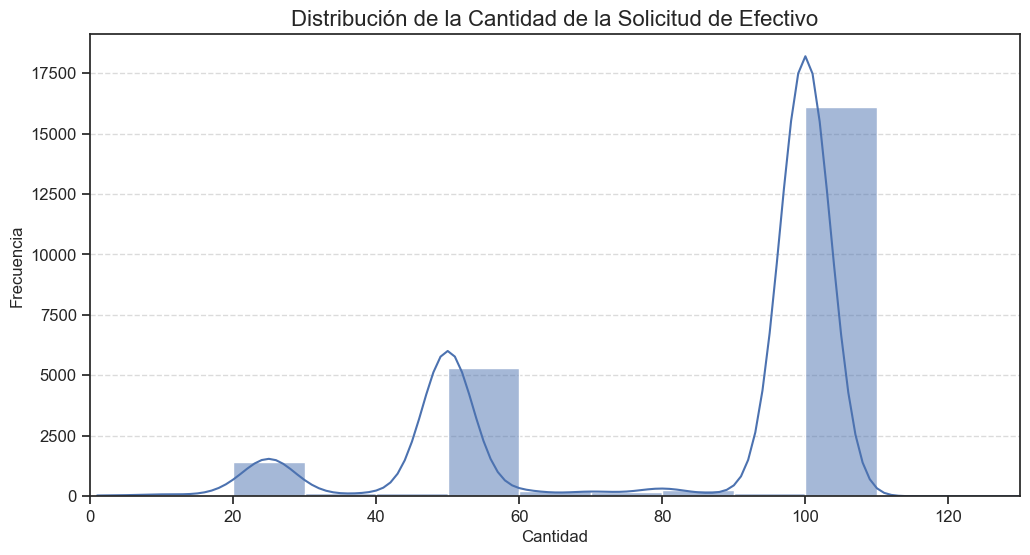

<Figure size 800x400 with 0 Axes>

In [170]:
plt.figure(figsize=(12, 6))
sns.histplot(cash['amount'] , bins=15, kde=True, alpha=0.5, binrange = (0,150))
plt.title('Distribución de la Cantidad de la Solicitud de Efectivo', fontsize=16)
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 130)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figure(figsize=(8,4), tight_layout=True)
plt.show()

C:\Users\Aleja\AppData\Local\Temp\ipykernel_1980\1848294911.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_sales = cash.groupby(cash['updated_at'].dt.to_period("M"))['amount'].count()


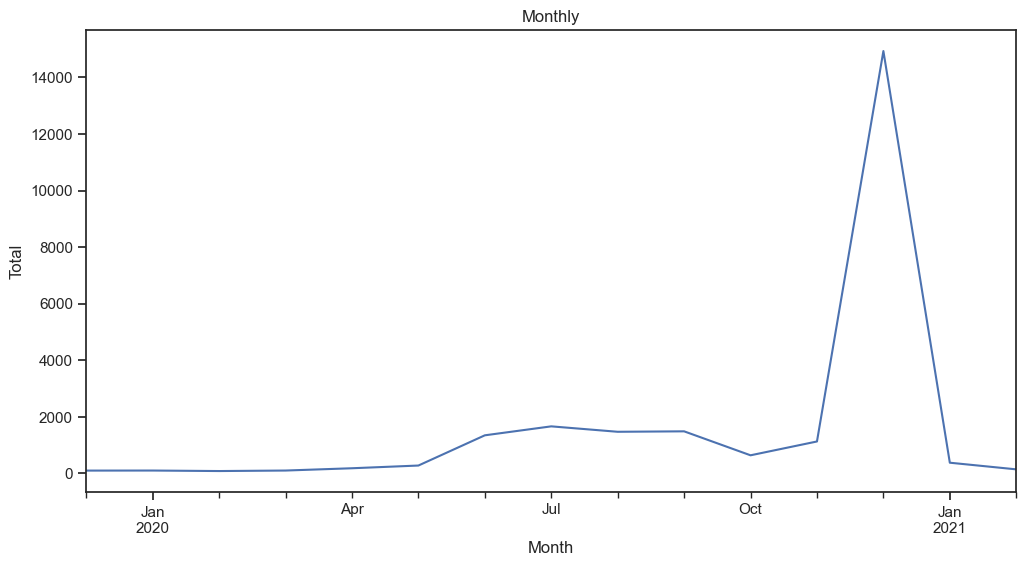

In [172]:
# Group data by date to analyze trends
monthly_sales = cash.groupby(cash['updated_at'].dt.to_period("M"))['amount'].count()
monthly_sales.plot(figsize=(12, 6))
plt.title('Monthly')
plt.xlabel('Month')
plt.ylabel('Total')
plt.show()

C:\Users\Aleja\AppData\Local\Temp\ipykernel_1980\558665910.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_sales = cash.groupby(cash['created_at'].dt.to_period("M"))['amount'].sum()


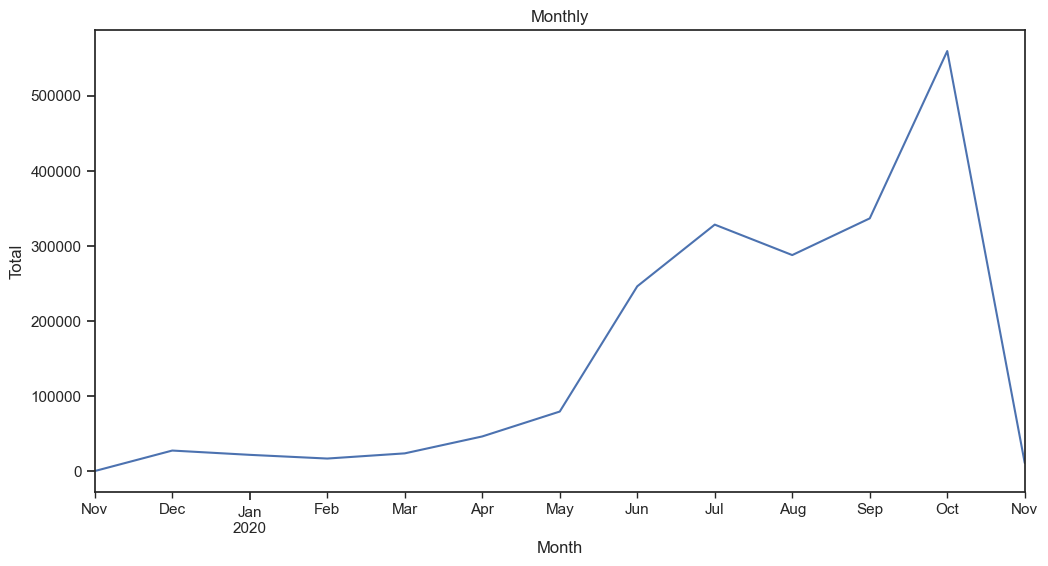

In [173]:
# Group data by date to analyze trends
monthly_sales = cash.groupby(cash['created_at'].dt.to_period("M"))['amount'].sum()
monthly_sales.plot(figsize=(12, 6))
plt.title('Monthly')
plt.xlabel('Month')
plt.ylabel('Total')
plt.show()

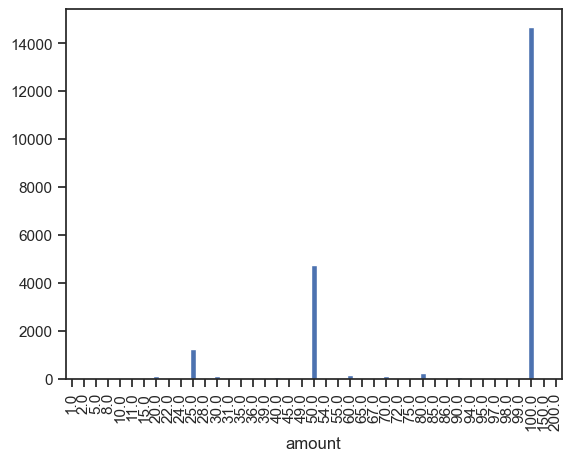

In [186]:
#cash.groupby(['transfer_type','status'])['status'].count().plot(kind='bar')
cash.groupby(['amount'])['user_id'].count().plot(kind='bar')
plt.show()

In [200]:
transfer_type = cash.groupby(["user_id"])["amount"].min()
transfer_type


user_id
34.0        100.0
35.0         50.0
47.0          1.0
52.0         10.0
53.0        100.0
            ...  
103425.0    100.0
103437.0    100.0
103496.0    100.0
103503.0     50.0
103719.0    100.0
Name: amount, Length: 10798, dtype: float64

In [ ]:
amount = cash.groupby(cash['amount'].dt.to_period("M"))['amount'].sum()


In [29]:
cash['status'].value_counts()

status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64

In [30]:
cash['status'].count()

23970